# THE SPARKS FOUNDATION

**Data Science and Business Analytics Internship (GRIP May2021)**

**TASK 1**: PREDICTION USING SUPERVISED ML

**PROBLEM**: Predict the percentage of marks of the students based on the number of study hours

**AUTHOR**: TANIA P R


**IMPORTING THE REQUIRED LIBRARIES**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

**IMPORTING THE DATA**

In [20]:
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


**DESCRIBING DATASET** 

In [21]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**DATA VISUALIZATION**

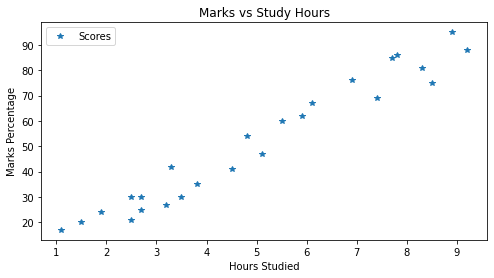

In [23]:
df.plot(x="Hours", y="Scores",figsize=(8,4),style='*')
plt.title('Marks vs Study Hours')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Percentage")
plt.show()

From the above scatter plot we know there is a positive linear relationship among the variable.Lets plot a regression line to confirm the correlation.

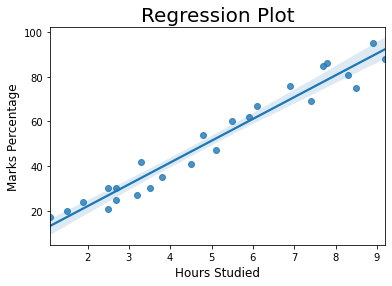

In [24]:
sns.regplot(x="Hours",y="Scores",data=df)
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [25]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000



It is confirmed that the variables are positively correlated.

**TRAINING THE MODEL**

**i**) SPLITTING THE DATA

In [26]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**ii**) FITTING THE LINEAR REGRESSION MODEL

In [29]:
linreg= LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

Plotting the regression line

In [33]:
r_line= linreg.coef_*X+linreg.intercept_ 

Plotting the trained data

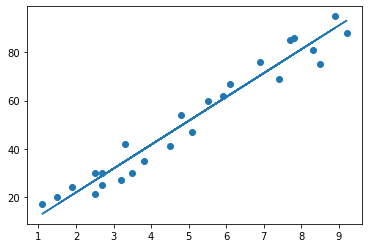

In [36]:
plt.scatter(X,y)
plt.plot(X,r_line)

**MAKING PREDICTIONS ON TEST DATA**

In [37]:
x_pred = linreg.predict(x_train)
y_pred = linreg.predict(x_test)

In [38]:
y_pred =linreg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [39]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

**COMPARING ACTUAL VALUES WITH PREDICTED SCORES**

In [40]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


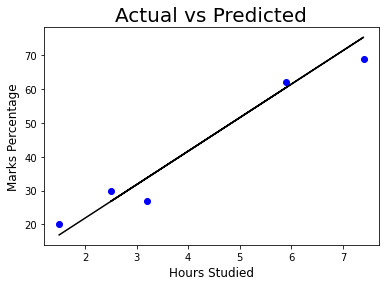

In [49]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**ACCURACY OF THE MODEL**

In [50]:
metrics.r2_score(y_test,y_pred)

0.9454906892105356

**EVALUATING THE MODEL**

In [51]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",MAE)

Mean Absolute Error:  4.183859899002975


The performance of the model is evaluated and it shows that the error is less that means our model is quite good

**THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 HRS/DAY?**

In [48]:
hours=[[9.25]]
pred = linreg.predict(hours)
pred

array([93.69173249])

**CONCLUSION**

If a student studies for 9.25 hours per day then the predicted score of the student is likely to be 93.69.

----------**THANK YOU**--------------